### Import Modules

In [4]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
sys.path.append("..")
from lpp_utils import *
from nilearn import datasets, plotting


#### Open the Mask

In [6]:
file = open('../../data_lpp/fmri_data/other/all293_masker_pickled.obj', 'rb') 
all293_masker_reopened = pickle.load(file)
file.close()
all293_masker_reopened

NiftiLabelsMasker(detrend=True, high_pass=0.01,
                  labels_img='../data_lpp/fmri_data/other/allcombined.nii',
                  low_pass=0.12, standardize=True, t_r=2.0)

#### load run 8 resampled

In [7]:
#all[50: (all.shape[0]-50) ,:,:].shape[0]
n_runs = 9

(291, 293, 50)
(291, 293, 27)
(291, 293, 33)
(291, 293, 110)
Assuming 110 subjects with 266 time points and 293 voxel(s) or ROI(s).
(5995, 293)
(315, 293, 50)
(315, 293, 27)
(315, 293, 33)
(315, 293, 110)
Assuming 110 subjects with 290 time points and 293 voxel(s) or ROI(s).
(5995, 293)
(338, 293, 50)
(338, 293, 27)
(338, 293, 33)
(338, 293, 110)
Assuming 110 subjects with 313 time points and 293 voxel(s) or ROI(s).
(5995, 293)


/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


(308, 293, 50)
(308, 293, 27)
(308, 293, 33)
(308, 293, 110)
Assuming 110 subjects with 283 time points and 293 voxel(s) or ROI(s).
(5995, 293)
(283, 293, 50)
(283, 293, 27)
(283, 293, 33)
(283, 293, 110)
Assuming 110 subjects with 258 time points and 293 voxel(s) or ROI(s).
(5995, 293)
(371, 293, 50)
(371, 293, 27)
(371, 293, 33)
(371, 293, 110)
Assuming 110 subjects with 346 time points and 293 voxel(s) or ROI(s).
(5995, 293)
(340, 293, 50)
(340, 293, 27)
(340, 293, 33)
(340, 293, 110)
Assuming 110 subjects with 315 time points and 293 voxel(s) or ROI(s).


/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(5995, 293)


/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


(293, 293, 50)
(293, 293, 27)
(293, 293, 33)
(293, 293, 110)
Assuming 110 subjects with 268 time points and 293 voxel(s) or ROI(s).
(5995, 293)
(368, 293, 50)
(368, 293, 27)
(368, 293, 33)
(368, 293, 110)
Assuming 110 subjects with 343 time points and 293 voxel(s) or ROI(s).
(5995, 293)


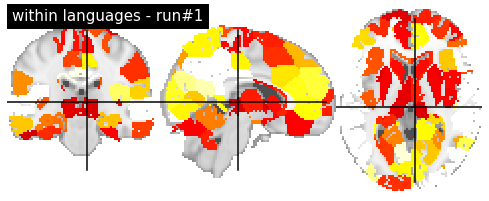

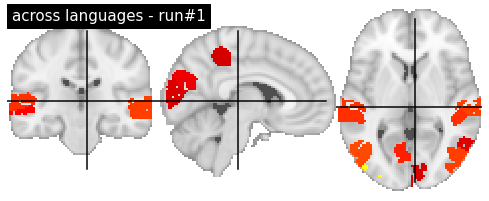

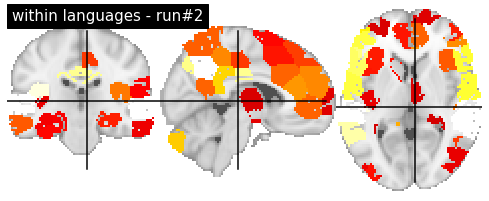

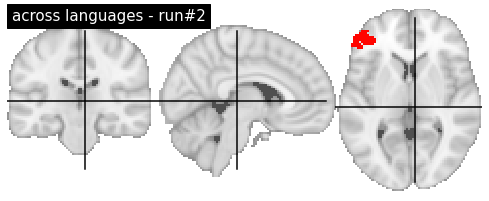

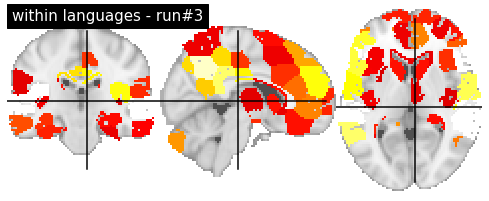

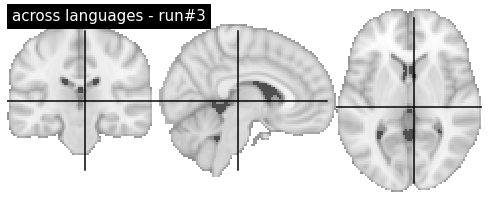

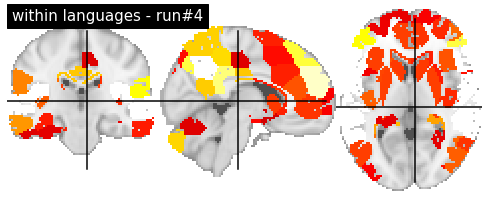

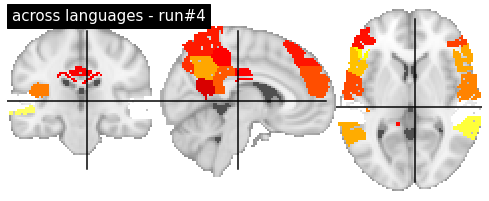

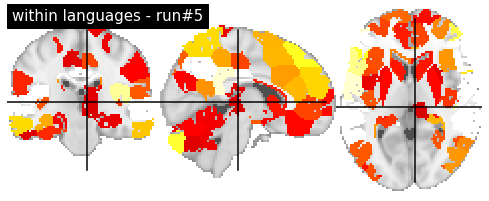

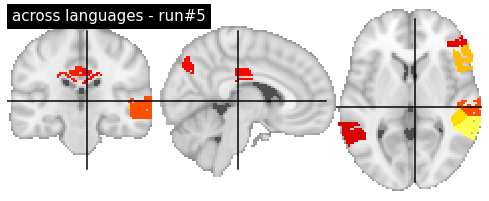

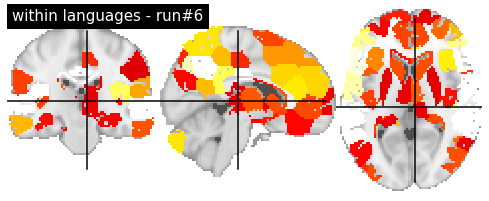

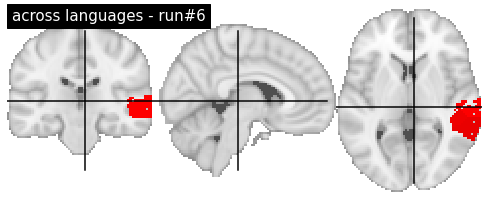

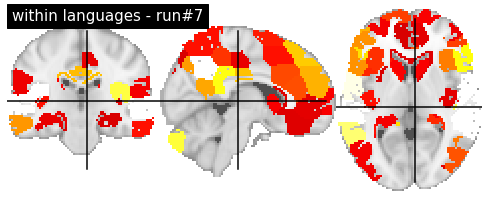

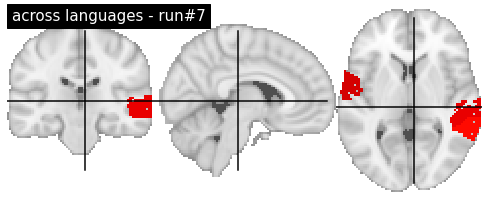

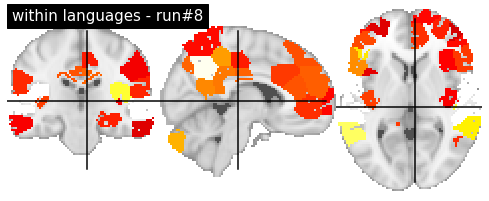

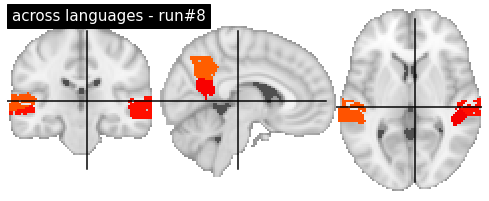

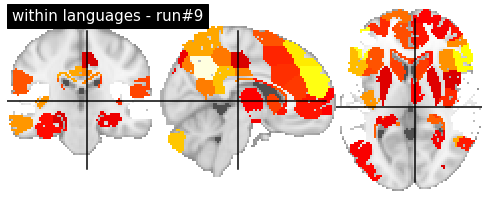

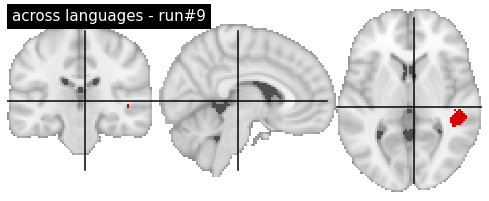

In [9]:
all_result_within = []
all_result_across = []

within_imgs = []
across_imgs = []

for curr_run  in range(n_runs):

    target_size = [291, 315, 338, 308, 283, 371, 340, 293, 368]
    curr_target_size = target_size[curr_run]

    data_en = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppEN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
    data_fr = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppFR-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
    data_cn = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppCN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
    print(data_en.shape)
    print(data_fr.shape)
    print(data_cn.shape)

    all_data = np.concatenate([data_en, data_fr, data_cn], axis =2)
    print(all_data.shape)

    result_all = lpp_isc(all_data[15:-10 ,:,:], pairwise=True)  # exclude first 10 TRs
    print(result_all.shape)


    import nilearn.connectome
    d = np.load('/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/littleprince_multilingual/data_lpp/fmri_data/other/shen_pauli_aan_dict.npy', allow_pickle=True).item()

    result_within_lang = np.zeros((293,1))
    result_across_lang = np.zeros((293,1))

    roi_list = [61]
    for i in range(293): #roi_list: #
        resmat = squareform(result_all[:,i])

        #print(resmat.shape)
        #50 27 33
        #lims = [0, 50, (50+27), (50+27+33)]
        #print(lims)
        #print(resmat[0:50, 0:50].shape) #within english
        #print(resmat[50:77, 50:77].shape) #within french
        #print(resmat[77:, 77:].shape) #within chinese

        #resmat[50:77, 0:50]

        w_e = nilearn.connectome.sym_matrix_to_vec(resmat[0:50, 0:50], discard_diagonal=True)
        w_f = nilearn.connectome.sym_matrix_to_vec(resmat[50:77, 50:77], discard_diagonal=True)
        w_c = nilearn.connectome.sym_matrix_to_vec(resmat[77:, 77:], discard_diagonal=True)

        a_ef = resmat[50:77, 0:50].flatten()
        a_ec = resmat[77:110, 0:50].flatten()
        a_fc = resmat[77:110, 50:77].flatten()


        thres = np.concatenate([w_e, w_f, w_c]).mean()

        result_within_lang[i] = np.concatenate([w_e, w_f, w_c]).mean()
        result_across_lang[i] = np.concatenate([a_ef, a_ec, a_fc]).mean()

        #if (thres>0.07) :
        #    print(i)
        #    print(d[i+1]['name'])
            #print(np.mean(w_e))
            #print(np.mean(w_f))
            #print(np.mean(w_c))
            #print(np.concatenate([w_e, w_f, w_c]).mean())
            #print(np.mean(a_ef))
            #print(np.mean(a_ec))
            #print(np.mean(a_fc))
            #print(np.concatenate([a_ef, a_ec, a_fc]).mean())
            #print('==')

    # plot

    #''' 
    curr_img = all293_masker_reopened.inverse_transform(result_within_lang.T)
    ct =  'within languages - run#' + str(curr_run+1)
    within_imgs.append(nilearn.image.index_img(curr_img,0))
    plotting.plot_stat_map( nilearn.image.index_img(curr_img,0), 
                                colorbar     = False, 
                                annotate     = False,
                                display_mode = "ortho",
                                cut_coords = [6, -24, 4],
                                threshold    = 0.03,
                                vmax         = 0.1,
                                title = ct);

    curr_img = all293_masker_reopened.inverse_transform(result_across_lang.T)
    ct =  'across languages - run#' + str(curr_run+1)
    across_imgs.append(nilearn.image.index_img(curr_img,0))
    plotting.plot_stat_map( nilearn.image.index_img(curr_img,0), 
                                colorbar     = False, 
                                annotate     = False,
                                display_mode = "ortho",
                                cut_coords = [6, -24, 4],
                                threshold    = 0.03,
                                vmax         = 0.1,
                                title = ct);  #'''           
    
    all_result_within.append(result_within_lang)
    all_result_across.append(result_across_lang)
    

In [16]:
result_all[:,89].shape

(5995,)

In [17]:
aa = np.random.rand(20,10)
print(aa.shape)

iscs = squareform(np.corrcoef(aa), checks=False)
print(iscs.shape)

print(np.corrcoef(aa).shape)




(20, 10)
(190,)
(20, 20)


In [18]:
miscs = squareform(iscs)
print(miscs.shape)

(20, 20)


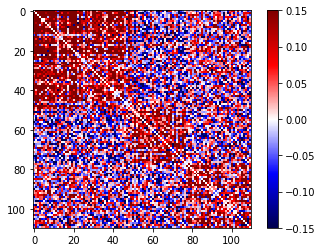

In [19]:
resmat = squareform(result_all[:,89])

plt.imshow(resmat, vmin = -0.15, vmax = 0.15, cmap = 'seismic', interpolation='nearest')
plt.colorbar()

0.7785972393416084
0.48922342057427126
0.6124493217845411


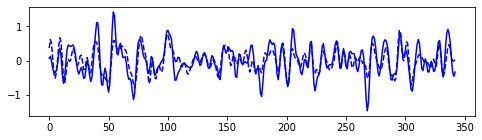

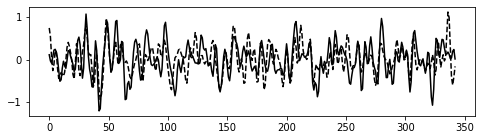

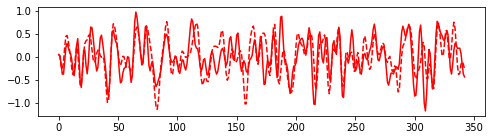

In [20]:
en1 = np.mean(data_en[15:-10,:, :25], axis=2)
en2 = np.mean(data_en[15:-10,:, 25:], axis=2)

fr1 = np.mean(data_fr[15:-10,:, :15], axis=2)
fr2 = np.mean(data_fr[15:-10,:, 15:], axis=2)

cn1 = np.mean(data_cn[15:-10,:, :15], axis=2)
cn2 = np.mean(data_cn[15:-10,:, 15:], axis=2)

roi = 89
plt.figure(figsize = (8,2))
plt.plot(en1[:,roi], color='blue');
plt.plot(en2[:,roi], color='blue', linestyle = 'dashed');
print(np.corrcoef(en1[:,roi], en2[:,roi])[0,1])

plt.figure(figsize = (8,2))
plt.plot(cn1[:,roi], color='black');
plt.plot(cn2[:,roi], color='black', linestyle = 'dashed');
print(np.corrcoef(cn1[:,roi], cn2[:,roi])[0,1])

plt.figure(figsize = (8,2))
plt.plot(fr1[:,roi], color='red');
plt.plot(fr2[:,roi], color='red', linestyle = 'dashed');
print(np.corrcoef(fr1[:,roi], fr2[:,roi])[0,1])

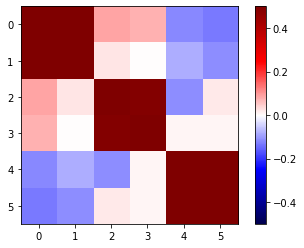

In [26]:
all_data
en1 = np.mean(data_en[15:-10,:, :25], axis=2)
en2 = np.mean(data_en[15:-10,:, 25:], axis=2)

fr1 = np.mean(data_fr[15:-10,:, :15], axis=2)
fr2 = np.mean(data_fr[15:-10,:, 15:], axis=2)

cn1 = np.mean(data_cn[15:-10,:, :15], axis=2)
cn2 = np.mean(data_cn[15:-10,:, 15:], axis=2)

allr = np.stack([en1[:,roi], en2[:,roi], cn1[:,roi], cn2[:,roi], fr1[:,roi], fr2[:,roi]])
plt.imshow(np.corrcoef(allr), cmap = 'seismic', vmin=-0.5, vmax=0.5);
plt.colorbar()

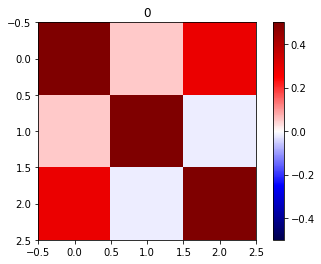

0
92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex


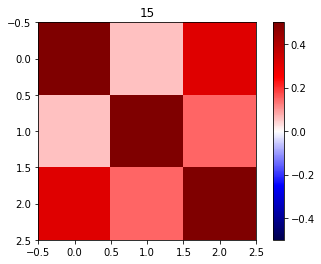

15
42.87% Inferior_Frontal_Gyrus_pars_triangularis; 25.98% Inferior_Frontal_Gyrus_pars_opercularis; 12.25% Frontal_Orbital_Cortex; 10.24% Frontal_Pole; 6.02% Frontal_Operculum_Cortex


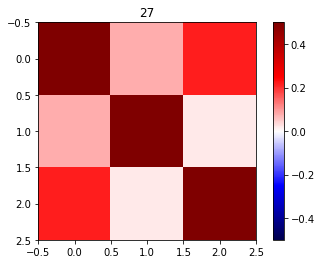

27
41.56% Paracingulate_Gyrus; 27.43% Superior_Frontal_Gyrus; 21.52% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex); 9.49% Cingulate_Gyrus_anterior_division


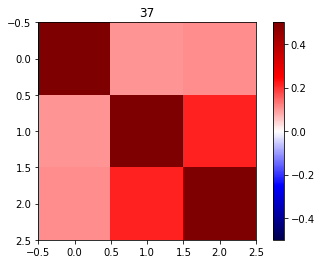

37
57.66% Superior_Parietal_Lobule; 36.57% Postcentral_Gyrus


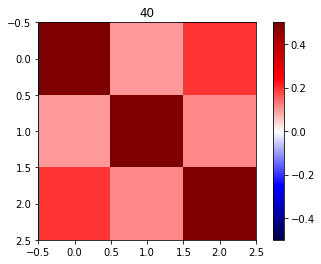

40
62.20% Superior_Parietal_Lobule; 27.99% Lateral_Occipital_Cortex_superior_division; 8.37% Postcentral_Gyrus


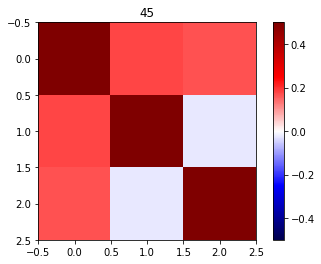

45
30.14% Parietal_Operculum_Cortex; 28.13% Planum_Temporale; 14.65% Supramarginal_Gyrus_posterior_division; 13.38% Supramarginal_Gyrus_anterior_division; 7.69% Superior_Temporal_Gyrus_posterior_division


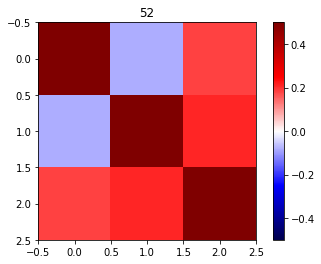

52
79.58% Temporal_Pole; 11.32% Middle_Temporal_Gyrus_anterior_division; 6.53% Superior_Temporal_Gyrus_anterior_division


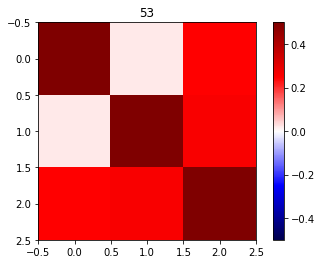

53
44.25% Middle_Temporal_Gyrus_posterior_division; 31.27% Superior_Temporal_Gyrus_posterior_division; 19.17% Middle_Temporal_Gyrus_temporooccipital_part; 5.01% Supramarginal_Gyrus_posterior_division


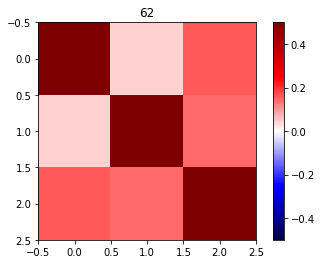

62
48.90% Middle_Temporal_Gyrus_posterior_division; 46.20% Superior_Temporal_Gyrus_posterior_division


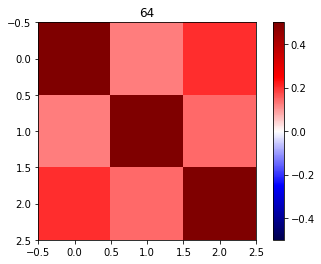

64
51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division


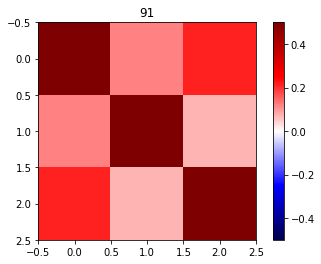

91
40.77% Right_Amygdala; 36.94% Temporal_Pole; 9.46% Insular_Cortex


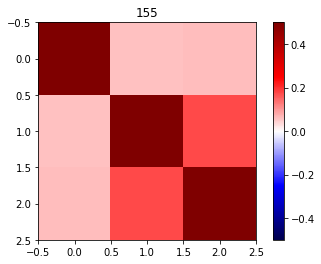

155
59.98% Inferior_Frontal_Gyrus_pars_opercularis; 29.99% Inferior_Frontal_Gyrus_pars_triangularis; 5.50% Frontal_Operculum_Cortex


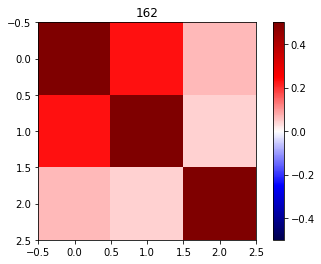

162
33.11% Central_Opercular_Cortex; 30.05% Precentral_Gyrus; 10.09% Superior_Temporal_Gyrus_anterior_division; 8.39% Planum_Polare; 5.78% Planum_Temporale


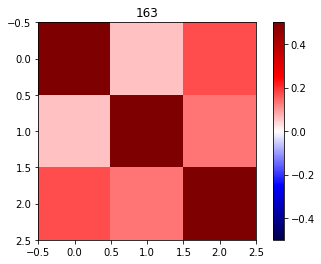

163
69.41% Superior_Frontal_Gyrus; 29.41% Middle_Frontal_Gyrus


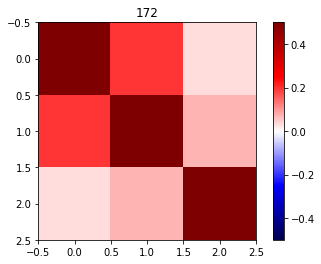

172
59.09% Central_Opercular_Cortex; 31.36% Insular_Cortex; 9.55% Heschl's_Gyrus_(includes_H1_and_H2)


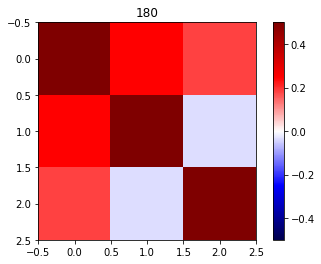

180
27.49% Supramarginal_Gyrus_anterior_division; 25.85% Postcentral_Gyrus; 20.47% Parietal_Operculum_Cortex; 13.45% Planum_Temporale; 10.88% Central_Opercular_Cortex


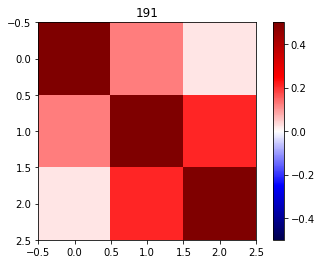

191
52.60% Middle_Temporal_Gyrus_temporooccipital_part; 21.00% Supramarginal_Gyrus_posterior_division; 14.85% Middle_Temporal_Gyrus_posterior_division; 7.53% Superior_Temporal_Gyrus_posterior_division


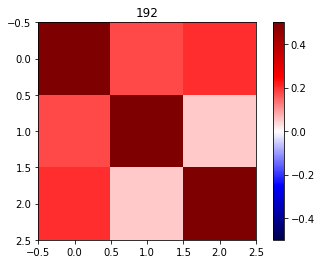

192
60.32% Middle_Temporal_Gyrus_posterior_division; 39.68% Inferior_Temporal_Gyrus_posterior_division


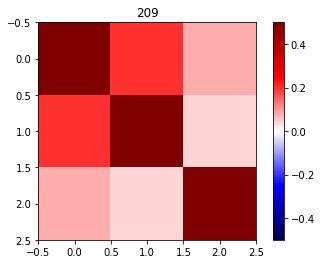

209
80.83% Lateral_Occipital_Cortex_inferior_division; 10.06% Occipital_Fusiform_Gyrus; 9.11% Occipital_Pole


In [37]:
ena = np.mean(data_en[15:-10,:, :], axis=2)
fra = np.mean(data_fr[15:-10,:, :], axis=2)
cna = np.mean(data_cn[15:-10,:, :], axis=2)

for roi in range(293):
    allrr = np.stack((ena[:,roi], fra[:,roi], cna[:,roi] ))
    acc = (np.corrcoef(allrr)[0,1] + np.corrcoef(allrr)[0,2] + np.corrcoef(allrr)[1,2])/3
    if (acc > 0.1):
        plt.imshow(np.corrcoef(allrr), cmap = 'seismic', vmin=-0.5, vmax=0.5);
        plt.title(str(roi))
        plt.colorbar()
        plt.show()
        
        print(roi)
        print(d[roi+1]['name'])
      
    

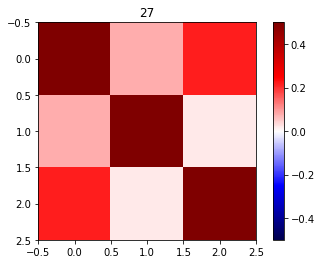

27
41.56% Paracingulate_Gyrus; 27.43% Superior_Frontal_Gyrus; 21.52% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex); 9.49% Cingulate_Gyrus_anterior_division
(1, 293)


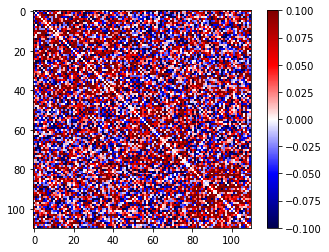

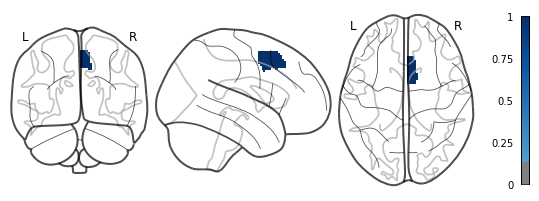

In [41]:
ena = np.mean(data_en[15:-10,:, :], axis=2)
fra = np.mean(data_fr[15:-10,:, :], axis=2)
cna = np.mean(data_cn[15:-10,:, :], axis=2)

roi = 27
allrr = np.stack((ena[:,roi], fra[:,roi], cna[:,roi] ))
acc = (np.corrcoef(allrr)[0,1] + np.corrcoef(allrr)[0,2] + np.corrcoef(allrr)[1,2])/3
if (acc > 0.1):
        plt.imshow(np.corrcoef(allrr), cmap = 'seismic', vmin=-0.5, vmax=0.5);
        plt.title(str(roi))
        plt.colorbar()
        plt.show()
        
        print(roi)
        print(d[roi+1]['name'])
        

resmat = squareform(result_all[:,roi])

plt.imshow(resmat, vmin = -0.1, vmax = 0.1, cmap = 'seismic', interpolation='nearest')
plt.colorbar()  

r2       = np.zeros((1,293))
r2[0,27] = 1
print(r2.shape)

res_img  = all293_masker_reopened.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          annotate = True,
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                         );

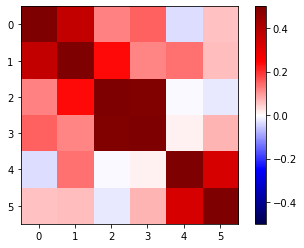

In [42]:
all_data
roi = 27
en1 = np.mean(data_en[15:-10,:, :25], axis=2)
en2 = np.mean(data_en[15:-10,:, 25:], axis=2)

fr1 = np.mean(data_fr[15:-10,:, :15], axis=2)
fr2 = np.mean(data_fr[15:-10,:, 15:], axis=2)

cn1 = np.mean(data_cn[15:-10,:, :15], axis=2)
cn2 = np.mean(data_cn[15:-10,:, 15:], axis=2)

allr = np.stack([en1[:,roi], en2[:,roi], cn1[:,roi], cn2[:,roi], fr1[:,roi], fr2[:,roi]])
plt.imshow(np.corrcoef(allr), cmap = 'seismic', vmin=-0.5, vmax=0.5);
plt.colorbar()

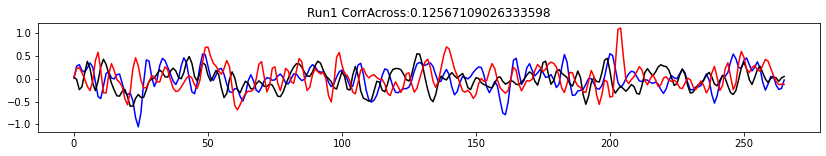

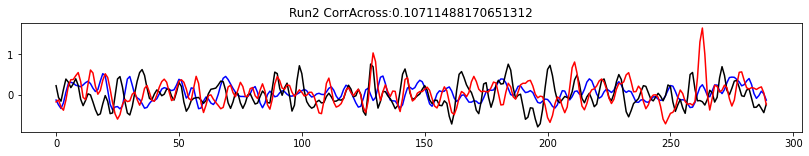

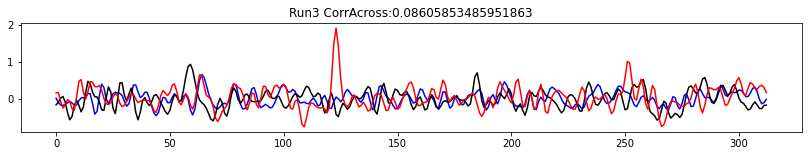

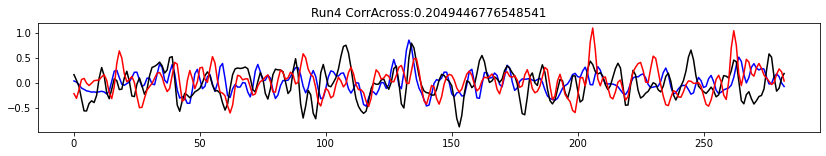

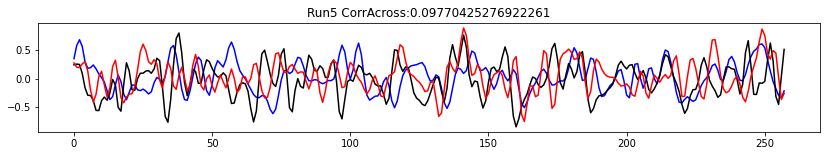

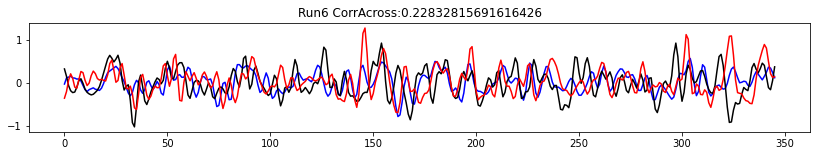

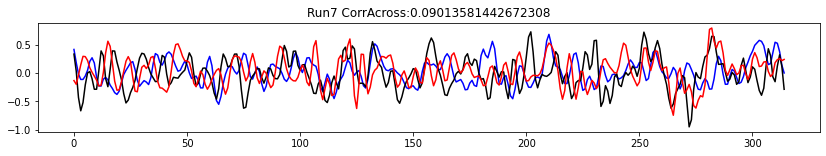

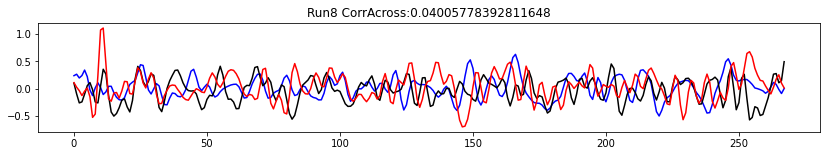

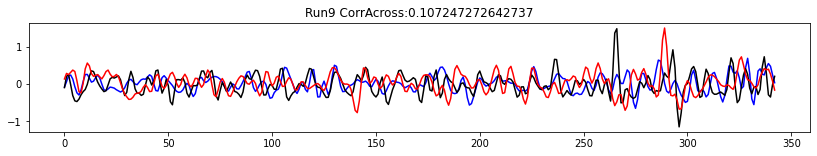

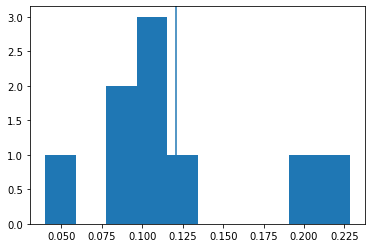

In [48]:
accs = []

for curr_run  in range(n_runs):

    target_size = [291, 315, 338, 308, 283, 371, 340, 293, 368]
    curr_target_size = target_size[curr_run]

    data_en = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppEN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
    data_fr = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppFR-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
    data_cn = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/task-lppCN-run-0" + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy")
 
    ena = np.mean(data_en[15:-10,:, :], axis=2)
    fra = np.mean(data_fr[15:-10,:, :], axis=2)
    cna = np.mean(data_cn[15:-10,:, :], axis=2)
    
    allrr = np.stack((ena[:,roi], fra[:,roi], cna[:,roi] ))
    acc = (np.corrcoef(allrr)[0,1] + np.corrcoef(allrr)[0,2] + np.corrcoef(allrr)[1,2])/3
    
    accs.append(acc)
    
    roi = 27
    plt.figure(figsize = (14,2))
    plt.plot(ena[:,roi], color='blue');
    plt.plot(cna[:,roi], color='black');
    plt.plot(fra[:,roi], color='red');
    plt.title('Run' + str(curr_run+1) + ' CorrAcross:' + str(acc))
    plt.show()
    
accs = np.asarray(accs)
ma = np.mean(accs)

plt.hist(accs)
plt.axvline(ma)


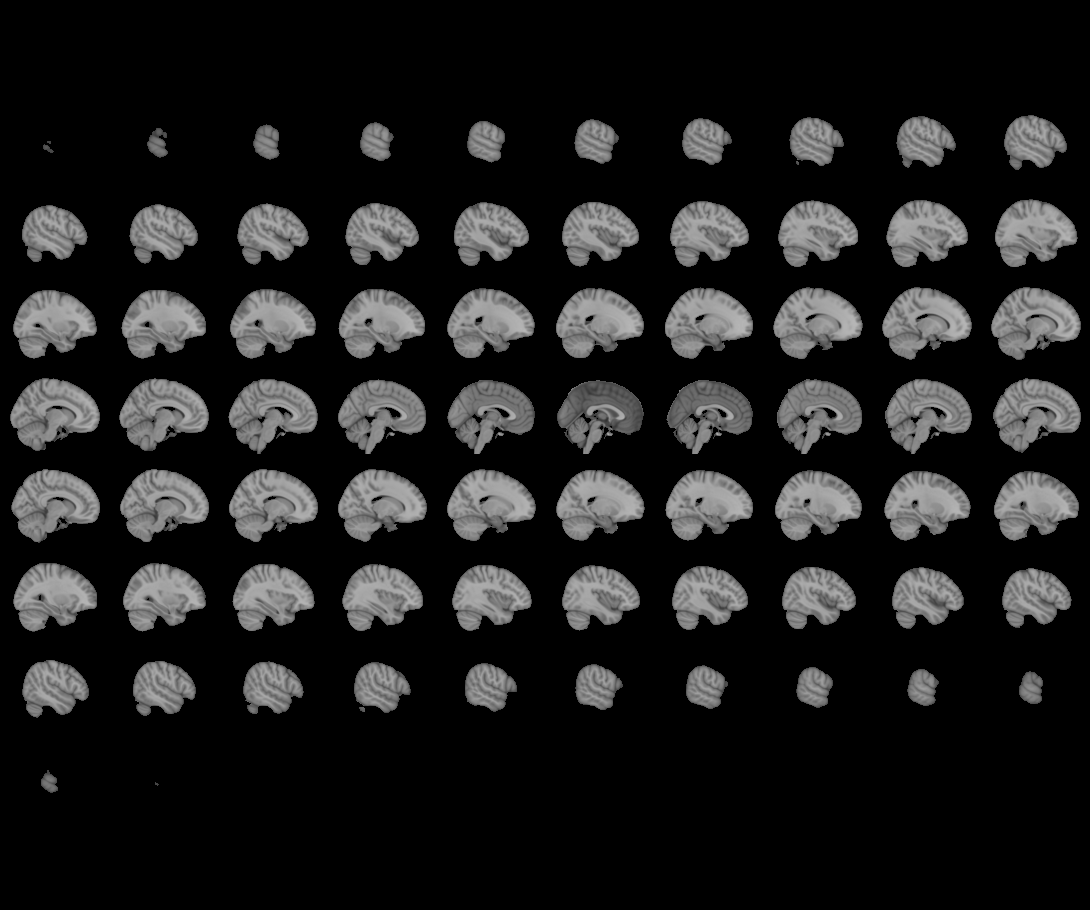
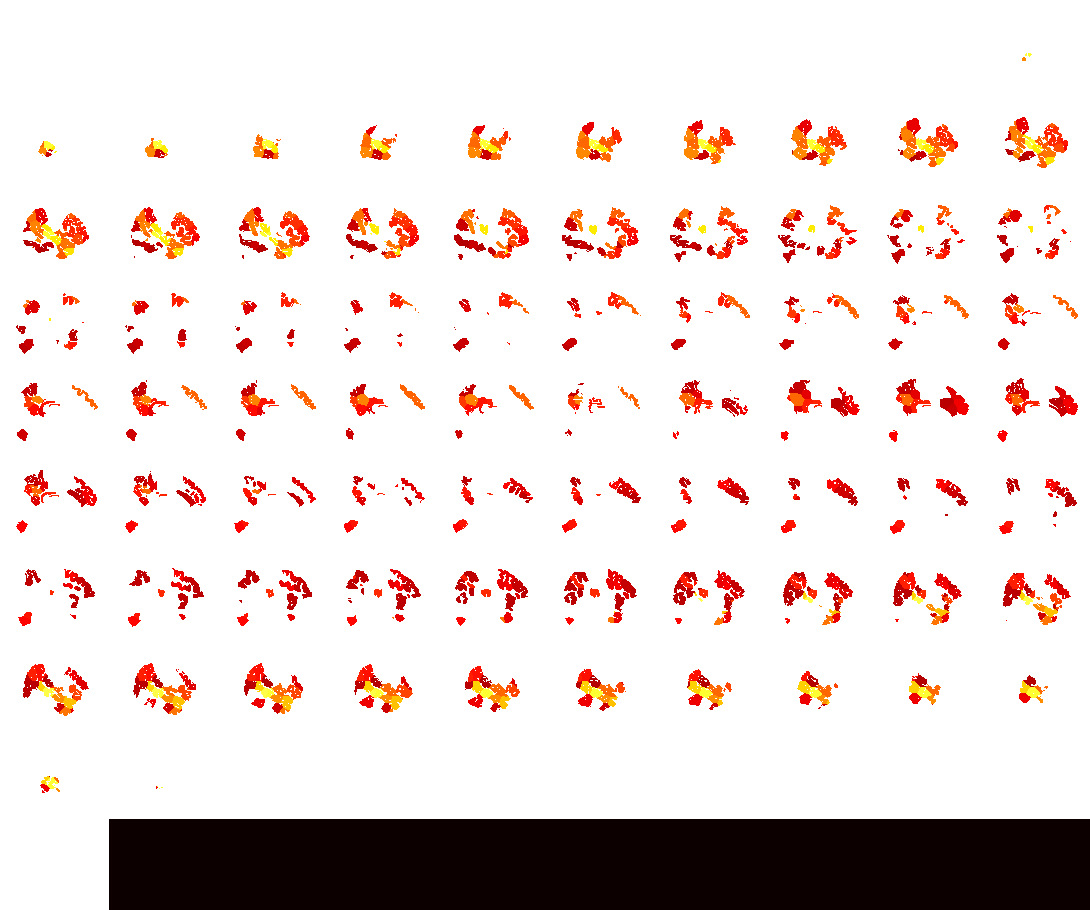

In [104]:
alli = nilearn.image.concat_imgs(within_imgs) 
meani = nilearn.image.mean_img(alli)
plotting.view_img( meani , 
                                    colorbar     = True, 
                                    annotate     = False,
                                    threshold    = 0.05,
                                    vmax         = 0.2,
                                    title = 'mean within runs')

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(



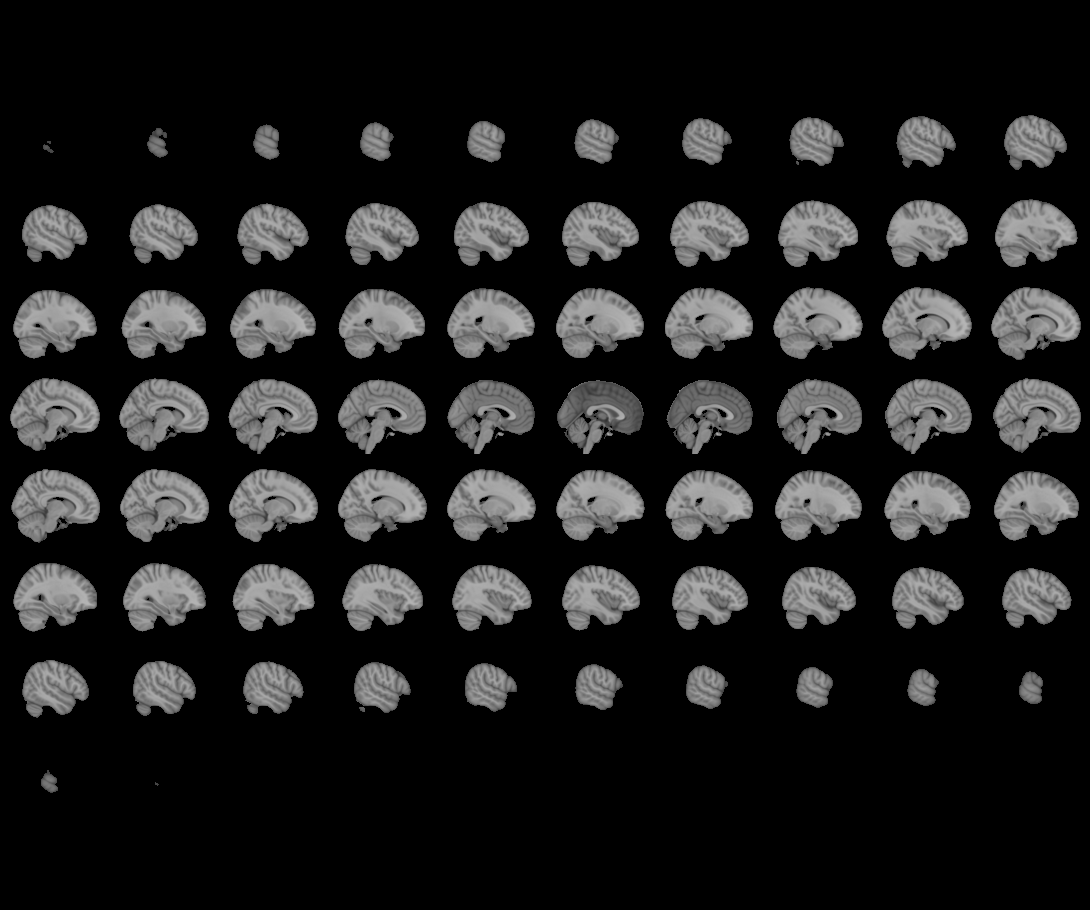
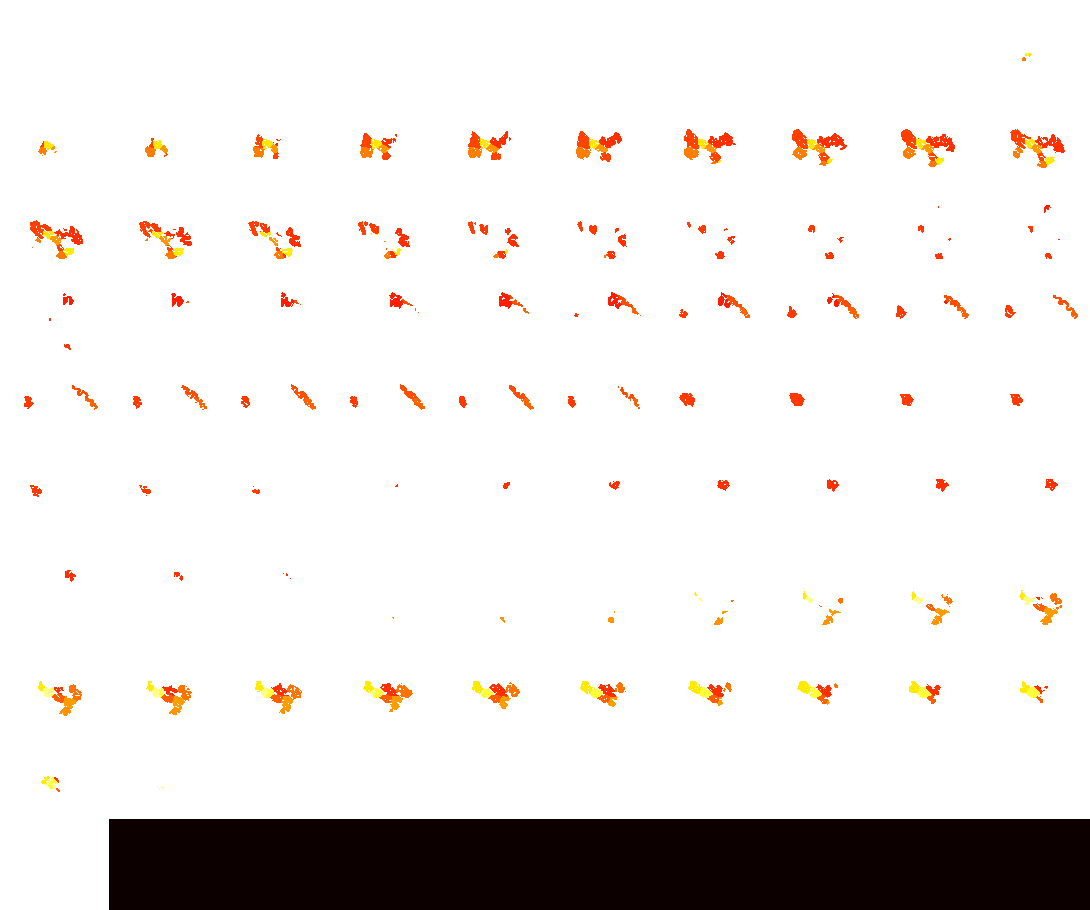

In [49]:
alli = nilearn.image.concat_imgs(across_imgs) 
meani = nilearn.image.mean_img(alli)
plotting.view_img( meani , 
                        colorbar     = True, 
                        annotate     = True,
                        threshold    = 0.02,
                        vmax         = 0.05,
                        title = 'mean across runs')

In [81]:
a_ec.mean()

-0.0008286559262075438

In [82]:
w_e.mean()

0.011118592743224631

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


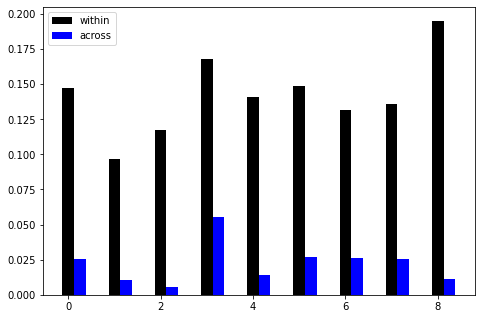

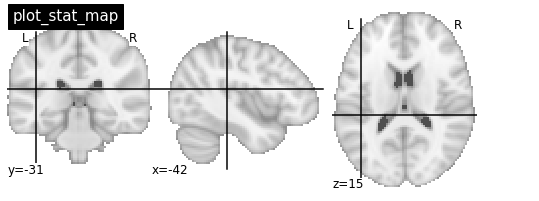

In [83]:
within = np.squeeze(np.asarray(all_result_within)).T
across = np.squeeze(np.asarray(all_result_across)).T

region = 179 #61 # 61


X = np.arange(9)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, within[region,:], color = 'black', width = 0.25, label = 'within')
ax.bar(X + 0.25, across[region,:], color = 'blue', width = 0.25, label = 'across')
plt.legend()

plotting.plot_stat_map(nilearn.image.index_img(curr_img,0),
                       threshold=30, 
                       title="plot_stat_map",
                       cut_coords=d[region + 1]['coords']);

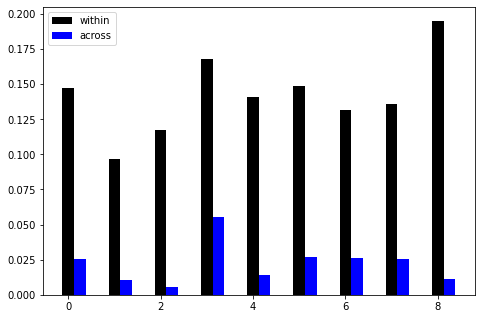

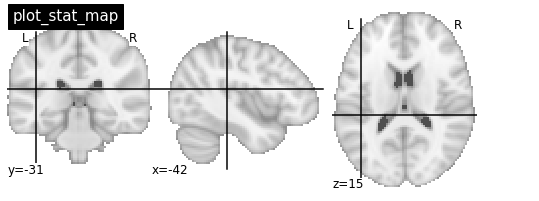

In [85]:
within = np.squeeze(np.asarray(all_result_within)).T
across = np.squeeze(np.asarray(all_result_across)).T

region = 179 #61 # 61


X = np.arange(9)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, within[region,:], color = 'black', width = 0.25, label = 'within')
ax.bar(X + 0.25, across[region,:], color = 'blue', width = 0.25, label = 'across')
plt.legend()

plotting.plot_stat_map(nilearn.image.index_img(curr_img,0),
                       threshold=30, 
                       title="plot_stat_map",
                       cut_coords=d[region + 1]['coords']);

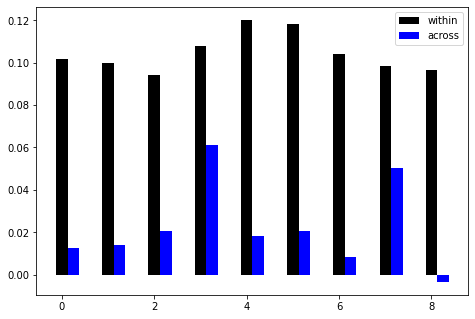

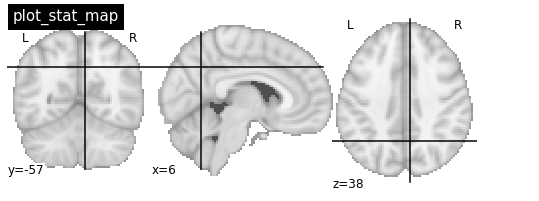

In [90]:
within = np.squeeze(np.asarray(all_result_within)).T
across = np.squeeze(np.asarray(all_result_across)).T

region = 89 #61 # 61


X = np.arange(9)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, within[region,:], color = 'black', width = 0.25, label = 'within')
ax.bar(X + 0.25, across[region,:], color = 'blue', width = 0.25, label = 'across')
plt.legend()

plotting.plot_stat_map(nilearn.image.index_img(curr_img,0),
                       threshold=30, 
                       title="plot_stat_map",
                       cut_coords=d[region + 1]['coords']);

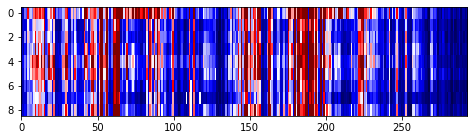

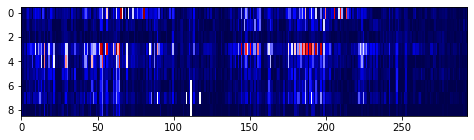

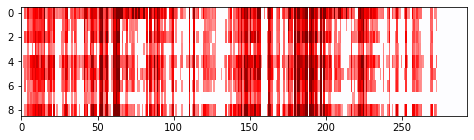

In [91]:
plt.figure(figsize = (8,2))
plt.imshow(within.T, interpolation='nearest', aspect='auto', vmin=0, vmax=0.10, cmap = 'seismic');

plt.figure(figsize = (8,2))
plt.imshow(across.T, interpolation='nearest', aspect='auto', vmin=0, vmax=0.10, cmap = 'seismic');


diff = within-across
diff[ abs(diff) < 0.02] = 0

plt.figure(figsize = (8,2))
plt.imshow(diff.T, interpolation='nearest', aspect='auto', vmin=-0.1, vmax=0.10, cmap = 'seismic');


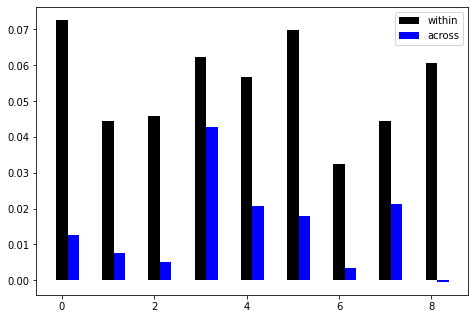

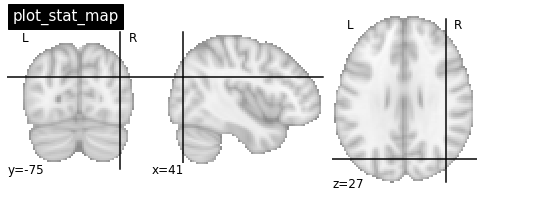

In [92]:
within = np.squeeze(np.asarray(all_result_within)).T
across = np.squeeze(np.asarray(all_result_across)).T

region = 48


X = np.arange(9)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, within[region,:], color = 'black', width = 0.25, label = 'within')
ax.bar(X + 0.25, across[region,:], color = 'blue', width = 0.25, label = 'across')
plt.legend()

plotting.plot_stat_map(nilearn.image.index_img(curr_img,0),
                       threshold=30, 
                       title="plot_stat_map",
                       cut_coords=d[region + 1]['coords']);

In [108]:
across.shape

(293, 9)

(293,)

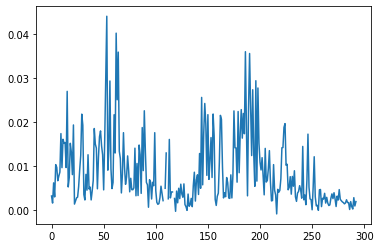

In [111]:
mean_across = np.mean(across, axis=1)
plt.plot(mean_across)
mean_across.shape

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(



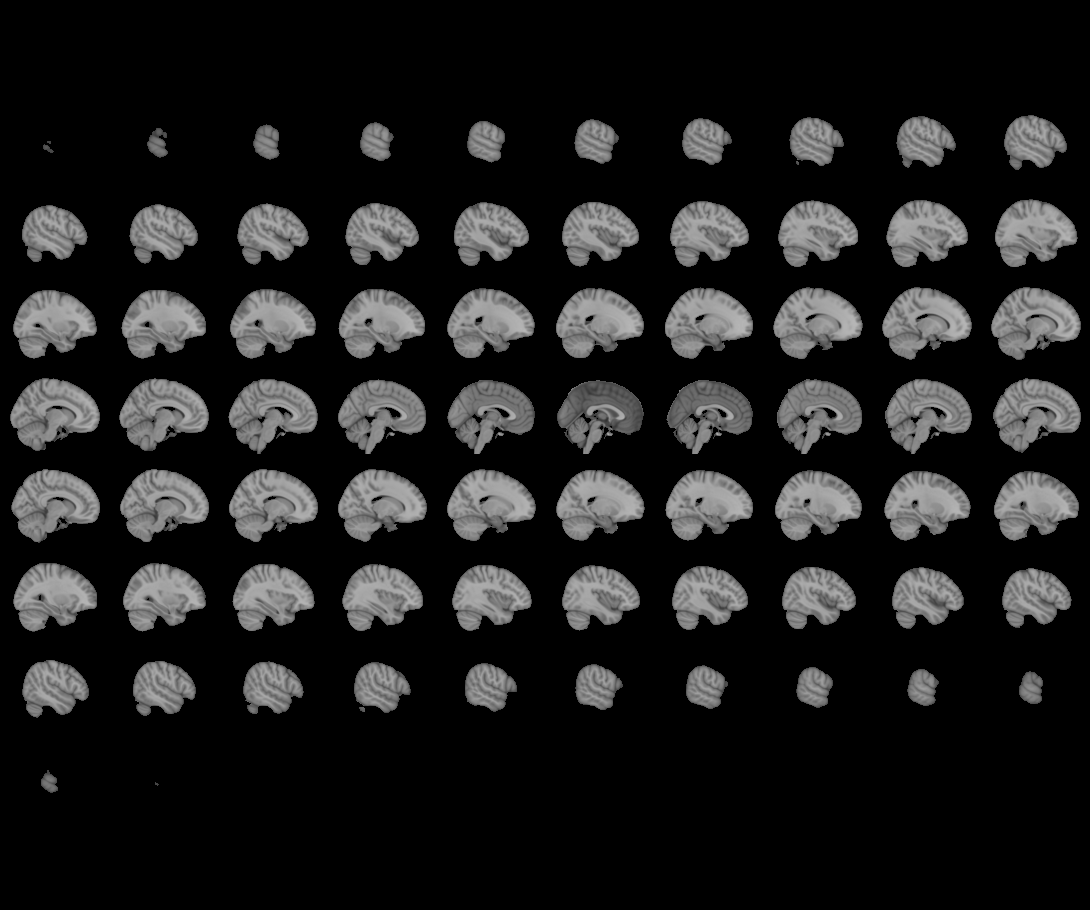
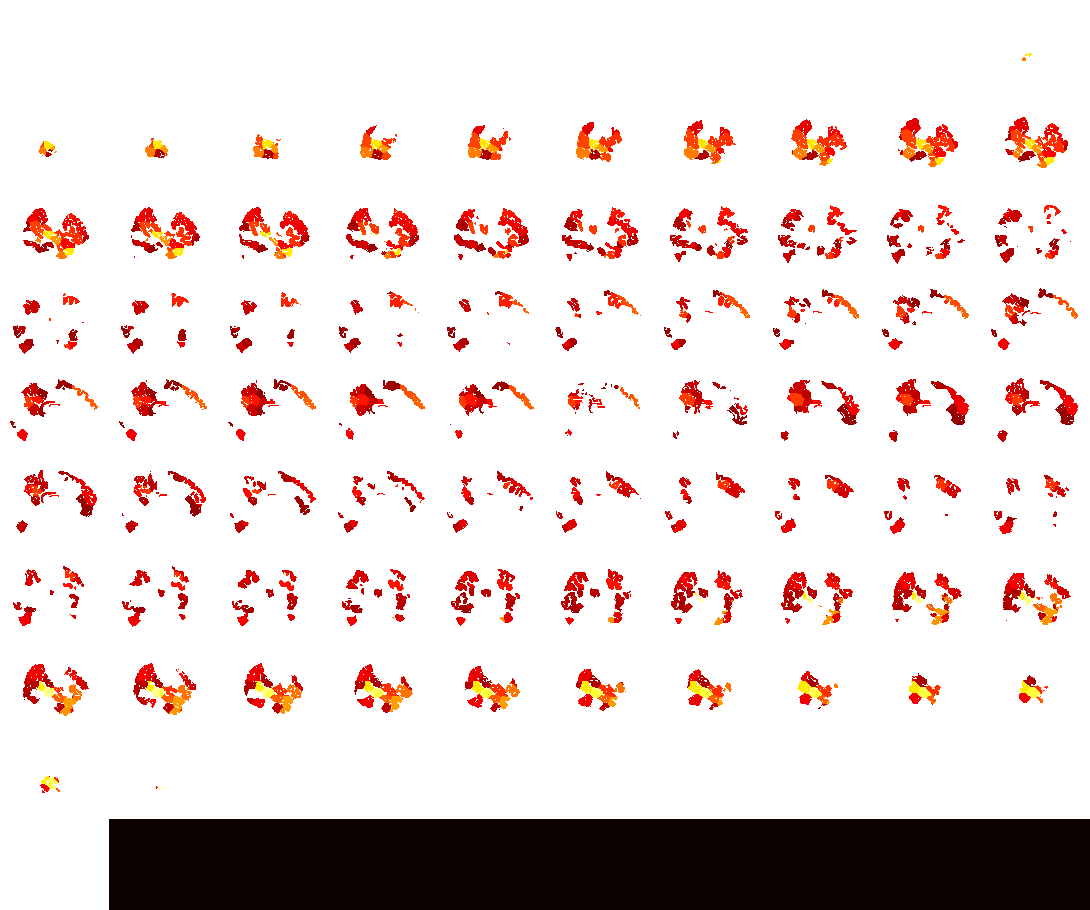

In [116]:
curr_img = all293_masker_reopened.inverse_transform(mean_across.reshape(1,293))
plotting.view_img( nilearn.image.index_img(curr_img,0), 
                                colorbar     = False, 
                                annotate     = False,
                                #display_mode = "ortho",
                                #cut_coords = [6, -24, 4],
                                threshold    = 0.01,
                                vmax         = 0.05,
                                title = ct)  #'''        

### next: correlate (the resampled) audio stimulus power ...
if yes - slightly problematic: could all be driven by bottom up - on the other hand: seems unlikely.
if no: then why is ISC across languages in auditory regions .


got pretty far, but seems end of this analysis thread is in sight.

also: check dynamic ISC fluctuations? 
Do they agree? (the across-within similarity could suggest this...)

Assuming 27 subjects with 309 time points and 293 voxel(s) or ROI(s).



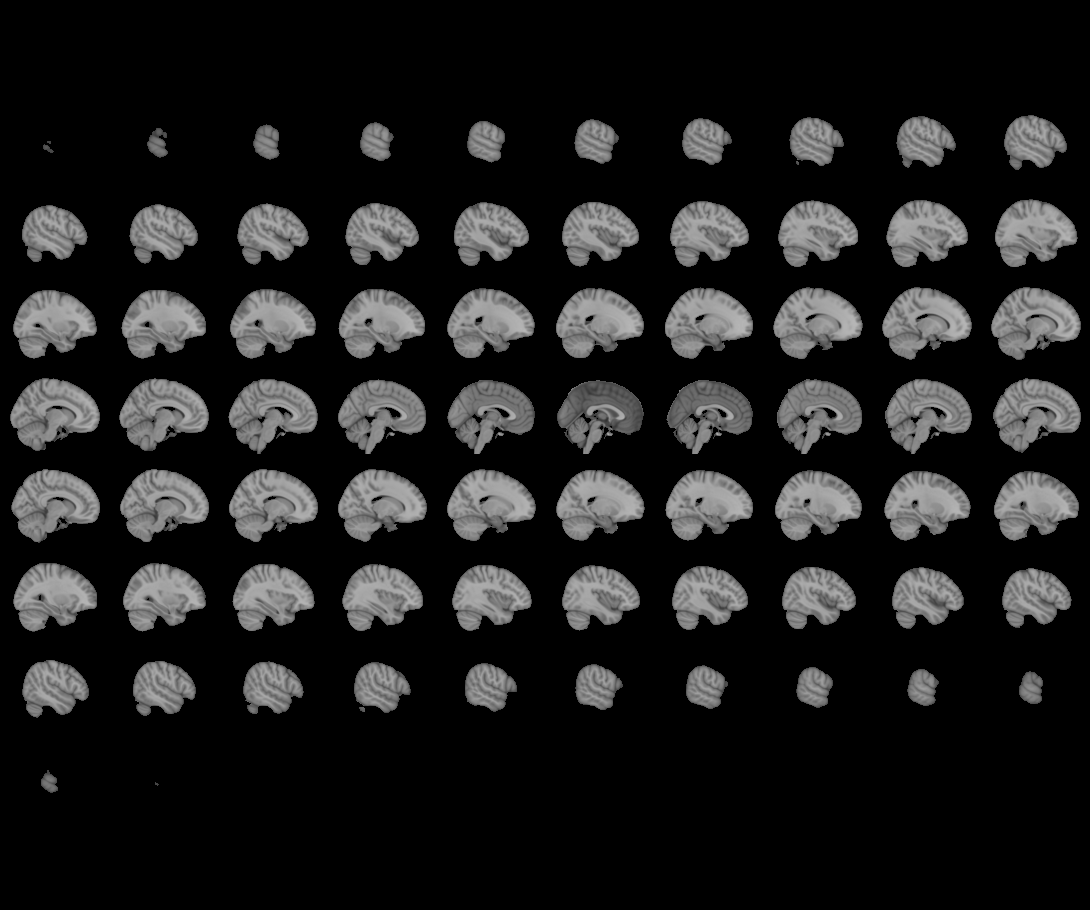
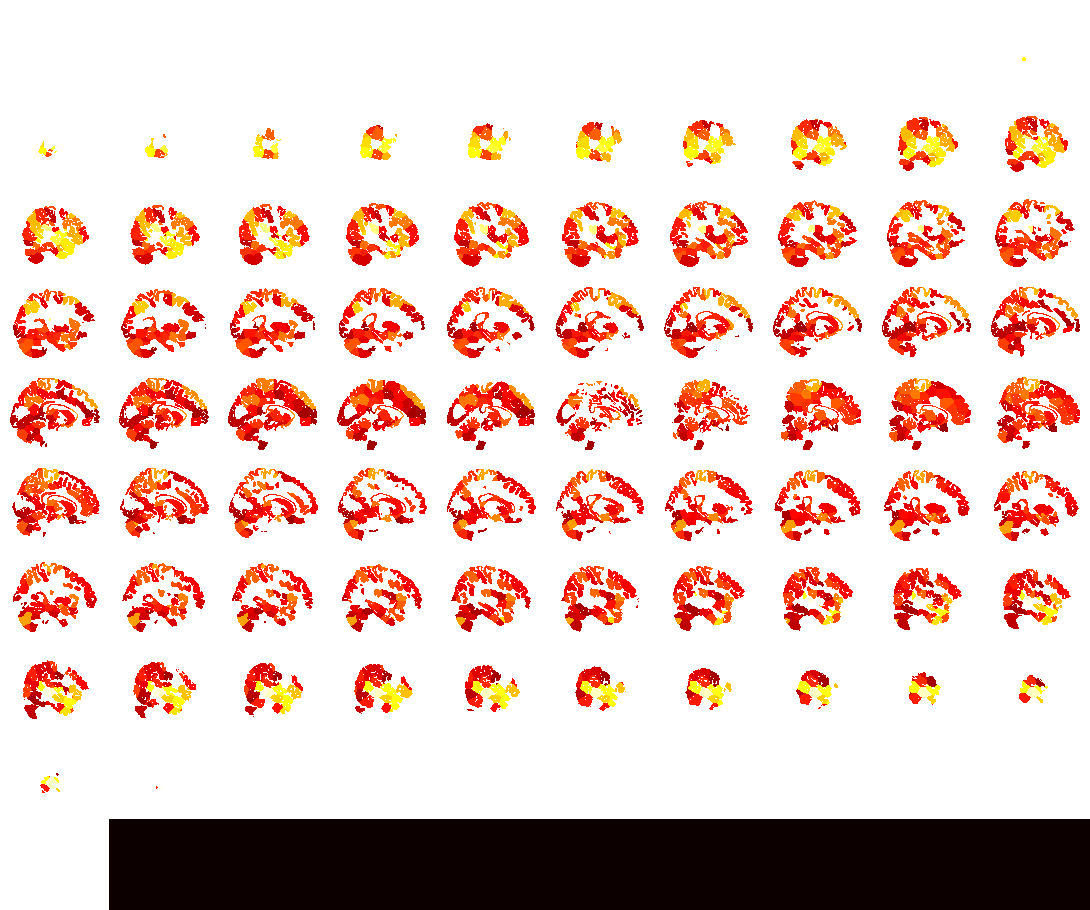

In [5]:
path = "../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppFR-run-01.npy"
curr_data = np.load(path)
res = lpp_isc(curr_data, summary_statistic = np.mean)
curr_img = all293_masker_reopened.inverse_transform(res)
nilearn.plotting.view_img(nilearn.image.index_img(curr_img,0),
                         threshold = 0.1, )

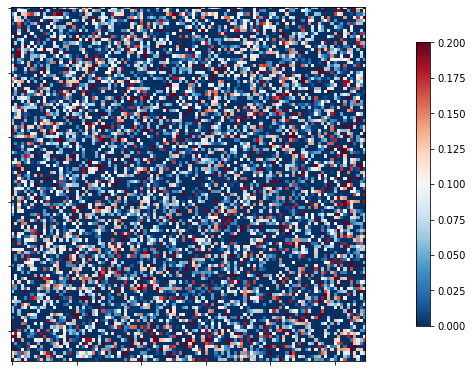

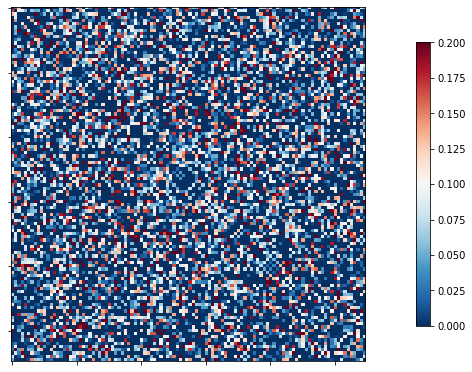

In [150]:

for i in range(2):
    resmat = nilearn.connectome.vec_to_sym_matrix(result_all[:,i], diagonal=np.zeros(110))
    nilearn.plotting.plot_matrix(resmat, vmin = 0, vmax = 0.2)

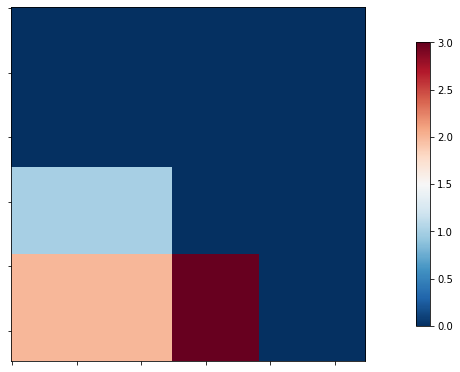

In [170]:
test = np.zeros((110,110))
test[50:77, 0:50] = 1
test[77:110, 0:50] = 2
test[77:110, 50:77] = 3
nilearn.plotting.plot_matrix(test, vmin = 0, vmax = 3)

In [241]:
import datetime

timestamp = 1633465514.870125
value = datetime.datetime.fromtimestamp(timestamp)
print(f"{value:%Y-%m-%d %H:%M:%S.%f}")

2021-10-05 16:25:14.870125
